# importing required libraries 

In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import random

In [4]:
from matplotlib import pyplot as plt

# defining the imshow() function

In [5]:
def imshow(title = 'image', image = None , size =10):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

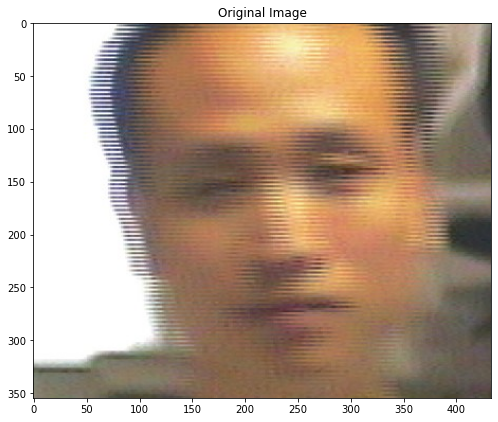

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [105 131 125]
  [106 129 121]
  [105 122 111]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [110 132 127]
  [107 127 122]
  [105 122 113]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [117 131 129]
  [111 125 123]
  [107 121 119]]

 ...

 [[123 135 141]
  [122 134 140]
  [119 131 137]
  ...
  [ 55  71  77]
  [ 51  67  73]
  [ 50  66  72]]

 [[123 133 140]
  [122 132 139]
  [118 130 136]
  ...
  [ 57  73  79]
  [ 53  69  75]
  [ 50  67  70]]

 [[121 131 138]
  [120 130 137]
  [117 129 135]
  ...
  [ 58  74  80]
  [ 55  71  77]
  [ 50  67  70]]]


In [121]:
noisy_image = cv2.imread("C:\\Users\\baksh\\Desktop\\The-image-captured-by-CCTV-camera-with-interlace-problem.jpg")
imshow('Original Image', noisy_image)
print(noisy_image)

# Plotting the Histogram for the original Noisy image 

# ravel() the function that flattens the image array 

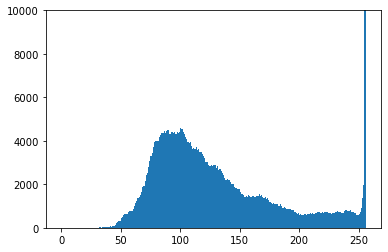

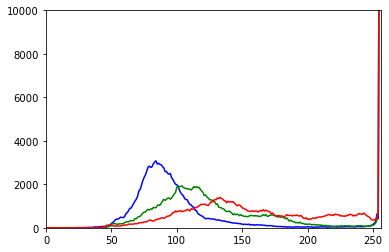

In [78]:
plt.hist(noisy_image.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

# also showing the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([noisy_image],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    
plt.show()

# Deblurring the image by convoluting the entire image through the defined kernel

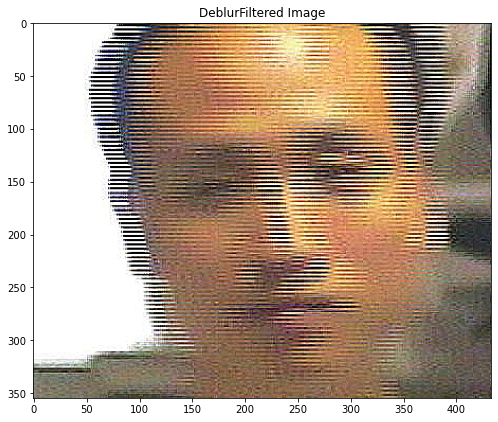

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 65 122 112]
  [100 146 129]
  [ 95  88  43]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 95 134 125]
  [ 97 130 130]
  [ 85  93  55]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [125 129 130]
  [110 118 125]
  [ 85  95 102]]

 ...

 [[127 136 148]
  [128 136 146]
  [127 130 138]
  ...
  [ 46  66  78]
  [ 35  54  63]
  [ 35  54  63]]

 [[135 139 149]
  [135 135 147]
  [119 133 137]
  ...
  [ 62  75  90]
  [ 51  65  77]
  [ 32  56  38]]

 [[115 125 132]
  [116 120 130]
  [109 127 130]
  ...
  [ 67  80  95]
  [ 67  80  95]
  [ 28  51  36]]]


In [142]:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]],np.float32)
image_filtered = cv2.filter2D(noisy_image, -1, kernel)
imshow('DeblurFiltered Image', image_filtered)
print(image_filtered)

# Plotting Histogram of the Deblurred Image 

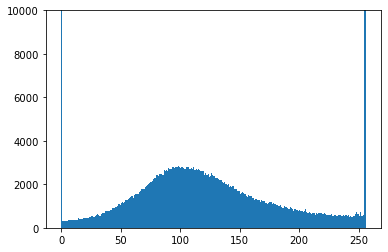

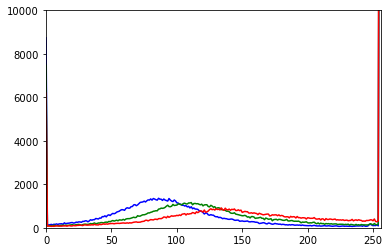

In [143]:
plt.hist(image_filtered.ravel(),256,[0,256])
plt.ylim([0,10000])
plt.show()

#now seperating the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image_filtered],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    
plt.show()

# performing sharpening of the image 

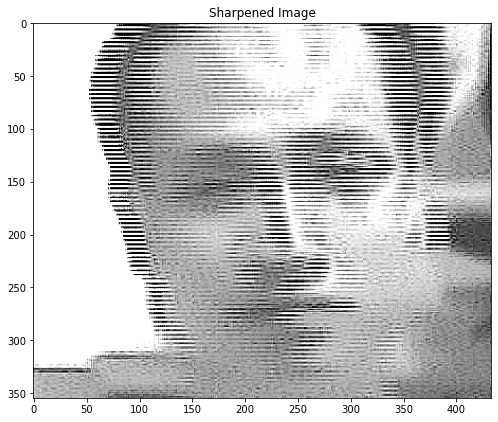

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [170 170 170]
  [204 204 204]
  [112 112 112]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [190 190 190]
  [189 189 189]
  [122 122 122]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [194 194 194]
  [178 178 178]
  [144 144 144]]

 ...

 [[201 201 201]
  [200 200 200]
  [194 194 194]
  ...
  [100 100 100]
  [ 82  82  82]
  [ 82  82  82]]

 [[204 204 204]
  [201 201 201]
  [195 195 195]
  ...
  [117 117 117]
  [100 100 100]
  [ 72  72  72]]

 [[188 188 188]
  [184 184 184]
  [188 188 188]
  ...
  [123 123 123]
  [123 123 123]
  [ 66  66  66]]]


In [147]:
image_gray = cv2.cvtColor(image_filtered, cv2.COLOR_BGR2GRAY)
#adding Gaussian Blur to the image 
blur= cv2.GaussianBlur(image_gray,(75,75),0)
image_sharp = cv2.subtract(image_gray, blur)
image_sharp  = cv2.addWeighted(image_gray,1.5, image_sharp,-0.5,0)
image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image", image_sharp)
print(image_sharp)

# plotting histogram of the sharpened image 

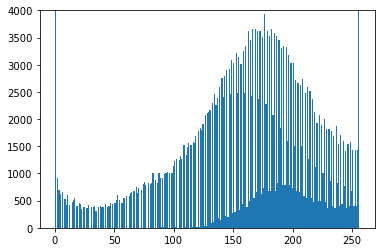

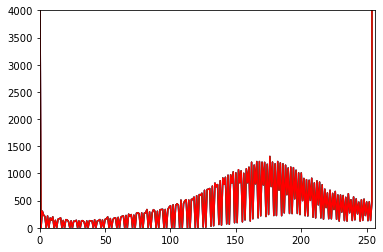

In [148]:
plt.hist(image_sharp.ravel(),256,[0,256])
plt.ylim([0,4000])
plt.show()

#now seperating the color channels
color = ('b', 'g', 'r')
# seperating the color channels and plotting the histogram 
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image_sharp],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,4000])
    
plt.show()

# applying histogram Equalization to the image 

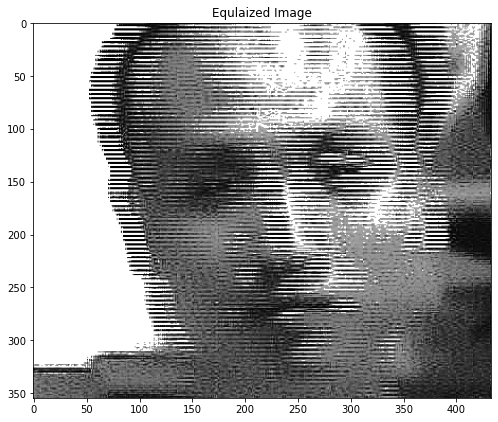

[[255 255 255 ...  89 133  30]
 [255 255 255 ... 117 115  36]
 [255 255 255 ... 122 101  57]
 ...
 [130 129 122 ...  24  17  17]
 [133 130 123 ...  33  24  14]
 [114 109 114 ...  37  37  12]]


In [149]:
gray = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)
imshow('Equlaized Image',equ)
print(equ)

# plotting histogram of the Equalized image

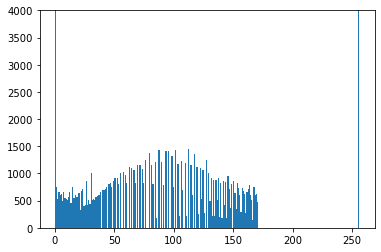

In [150]:
plt.hist(equ.ravel(),256,[0,256])
plt.ylim([0,4000])
plt.show()

# converting back to a colored image 

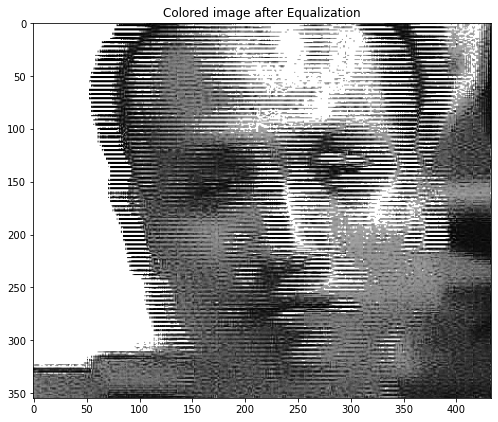

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 89  89  89]
  [133 133 133]
  [ 30  30  30]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [117 117 117]
  [115 115 115]
  [ 36  36  36]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [122 122 122]
  [101 101 101]
  [ 57  57  57]]

 ...

 [[130 130 130]
  [129 129 129]
  [122 122 122]
  ...
  [ 24  24  24]
  [ 17  17  17]
  [ 17  17  17]]

 [[133 133 133]
  [130 130 130]
  [123 123 123]
  ...
  [ 33  33  33]
  [ 24  24  24]
  [ 14  14  14]]

 [[114 114 114]
  [109 109 109]
  [114 114 114]
  ...
  [ 37  37  37]
  [ 37  37  37]
  [ 12  12  12]]]


In [151]:
image_colored = cv2.cvtColor(equ,cv2.COLOR_GRAY2BGR)
imshow('Colored image after Equalization',image_colored)
print(image_colored)

# viewing the color channels of the equalized image 

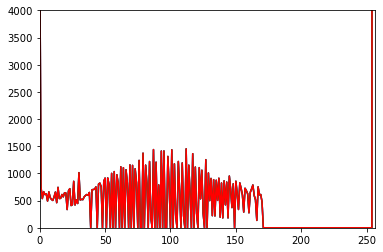

In [152]:
color = ('b','g','r')
for i,col in enumerate(color):
    histogram2= cv2.calcHist([image_colored],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,4000])
    
plt.show()

# Balancing the colors of the image 

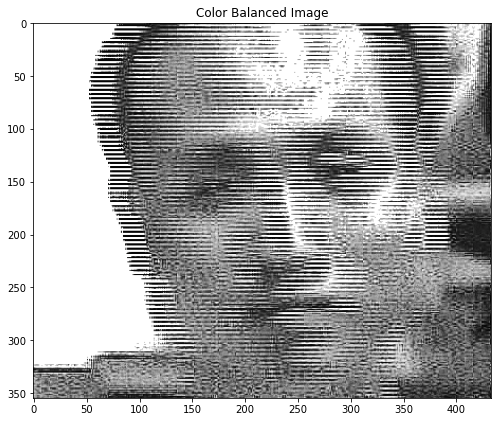

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 77  77  77]
  [129 129 129]
  [ 29  29  30]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [108 108 108]
  [105 105 105]
  [ 34  34  34]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [113 114 113]
  [ 90  90  90]
  [ 50  50  50]]

 ...

 [[180 180 180]
  [178 178 178]
  [164 164 164]
  ...
  [ 36  37  36]
  [ 21  21  21]
  [ 21  21  21]]

 [[185 185 185]
  [180 180 180]
  [166 166 166]
  ...
  [ 62  62  62]
  [ 36  37  36]
  [ 16  16  16]]

 [[149 149 149]
  [139 139 139]
  [149 149 149]
  ...
  [ 75  75  75]
  [ 75  75  75]
  [ 11  11  11]]]


In [153]:
lab = cv2.cvtColor(image_colored, cv2.COLOR_BGR2LAB)
l,a,b= cv2.split(lab)


clahe = cv2.createCLAHE(clipLimit = 3.0,tileGridSize=(8,8))
l_clahe=clahe.apply(l)

lab_clahe=cv2.merge((l_clahe,a,b))

image_colorbalanced = cv2.cvtColor(lab_clahe,cv2.COLOR_LAB2BGR)
imshow('Color Balanced Image', image_colorbalanced)
print(image_colorbalanced)

# plotting histogram of color balanced image 

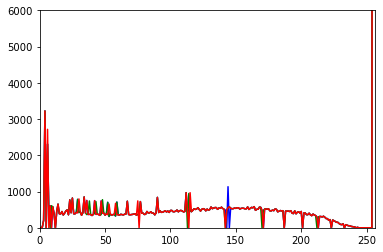

In [154]:
#now viewing the coloor channels 
color = ('b','g','r')

#seperating each color channel and plotting the histogram 
for i,col in enumerate(color):
    histogram2= cv2.calcHist([image_colorbalanced],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,6000])
    
plt.show()

# Denoising the image 

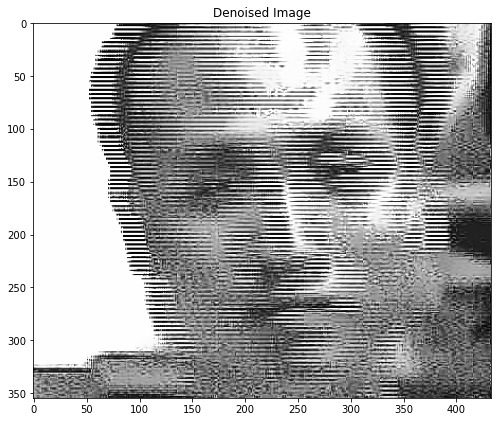

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [ 79  79  79]
  [127 127 127]
  [ 29  29  29]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [106 106 106]
  [104 104 104]
  [ 33  33  33]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [113 113 113]
  [ 92  92  92]
  [ 49  49  49]]

 ...

 [[178 178 178]
  [174 174 174]
  [164 164 164]
  ...
  [ 36  36  36]
  [ 21  21  21]
  [ 21  21  21]]

 [[180 180 180]
  [178 178 178]
  [168 168 168]
  ...
  [ 62  62  62]
  [ 36  36  36]
  [ 16  16  16]]

 [[153 153 153]
  [146 146 146]
  [148 148 148]
  ...
  [ 75  75  75]
  [ 75  75  75]
  [ 11  11  10]]]


In [155]:
dst = cv2.fastNlMeansDenoisingColored(image_colorbalanced, None,9,6,7,21)
imshow("Denoised Image",dst)
print(dst)

# Denoising the image using Bilateral Filter

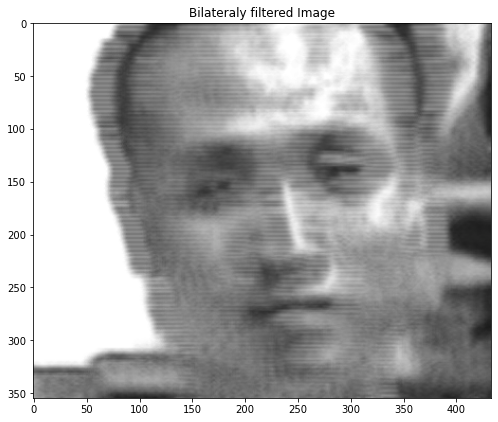

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [114 114 114]
  [103 104 104]
  [ 96  96  96]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [113 113 113]
  [103 103 103]
  [ 96  96  96]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [109 110 110]
  [101 101 101]
  [ 99  99  99]]

 ...

 [[160 160 160]
  [158 158 158]
  [152 152 152]
  ...
  [ 49  49  49]
  [ 46  46  46]
  [ 47  47  47]]

 [[163 163 163]
  [160 160 160]
  [154 154 154]
  ...
  [ 47  47  47]
  [ 46  46  46]
  [ 46  47  46]]

 [[164 164 164]
  [161 161 161]
  [156 156 156]
  ...
  [ 45  45  45]
  [ 44  45  44]
  [ 45  46  45]]]


In [191]:
image_bfiltered = cv2.bilateralFilter(image_colorbalanced, d=9, sigmaColor = 11000, sigmaSpace = 2000)
imshow('Bilateraly filtered Image', image_bfiltered)
print(image_bfiltered)

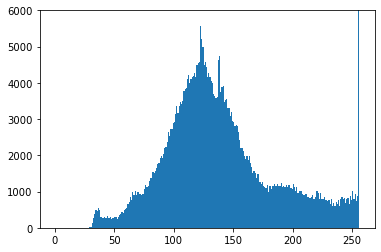

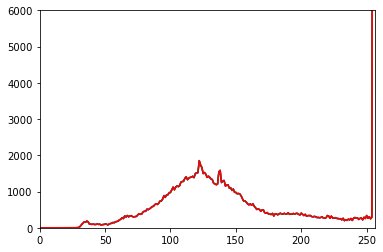

In [170]:
plt.hist(image_bfiltered.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

#now viewing the coloor channels 
color = ('b','g','r')

#seperating each color channel and plotting the histogram 
for i,col in enumerate(color):
    histogram2= cv2.calcHist([image_bfiltered],[i],None,[256],[0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.ylim([0,6000])
    
plt.show()

# Image with enhanced pixels

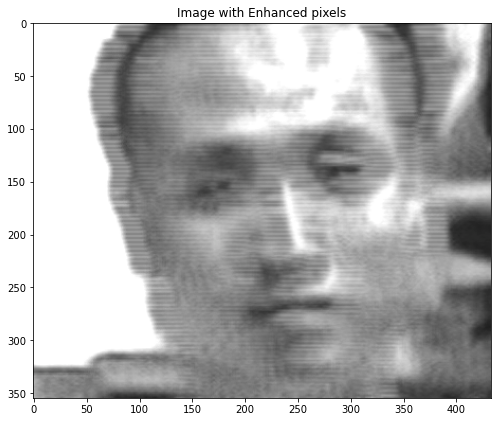

In [205]:
alpha = 1.1
beta = 1
image_enhanced = cv2.convertScaleAbs(image_bfiltered, alpha = alpha , beta = beta )
imshow('Image with Enhanced pixels', image_enhanced)

# using Haar Frontal-face and eyes- Cascade Classifier

In [210]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
gray = cv2.cvtColor(noisy_image,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(gray,1.5,minNeighbors=5) 


for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(noisy_image, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(noisy_image, (x,y), (x+w,y+h),(127,0,255),15)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=noisy_image[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        
if face == ():
    print("No faces found")   
else:
    imshow('Face Detection and Eyes',noisy_image)

No faces found


C:\Users\baksh\AppData\Local\Temp\ipykernel_30380\4148173356.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_30380\4148173356.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


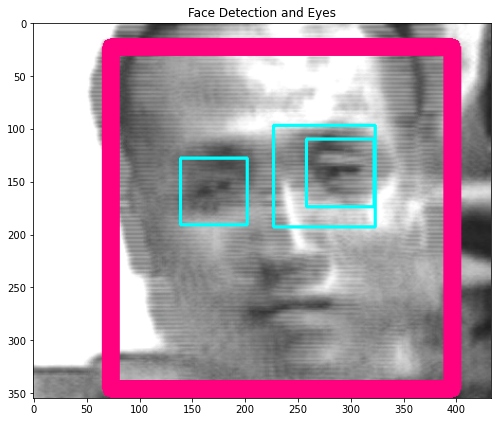

In [206]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
gray = cv2.cvtColor(image_enhanced,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(gray,1.3,5) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_enhanced, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_enhanced, (x,y), (x+w,y+h),(127,0,255),15)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=image_enhanced[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_enhanced)